# Machine Learning
## ประเภทของ Ml (แบ่งตามลักษณะ การสอนของModel)คือ
    1. supervised - แบบมีผู้สอนโดยกำหนดข้อมูล และบอกModel ว่าให้ทำอะไร และให้ตัวอย่างการทำงานไป
    2. unsupervised - ไม่มีผู้สอน ให้ข้อมูลและ โมเดลจะวิเคราะห์เอง ว่าต้องทำอะไร 
    3. rienforcement - มีการสอนในเบื่องต้น และเรียนรู้จากการลองผิดลองถูกของ Model โดยเป็นการให้คะแนนและหักคะแนน
## ประเภทของ Model คือ
    1. classifation - แบ่งกลุ่มของข้อมูลเช่น กลุ่มของผู้ป่ายกับคนธรรมดา (supervised)
    2. regression - การทำนายค่าต่างๆ (supervised)
    3. rienforcement

## Regression

![ขั้นตอนการ Modeling](https://sv1.picz.in.th/images/2019/01/17/9m0dFu.md.png "ขั้นตอนการ Modeling")





In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clear-data.csv')


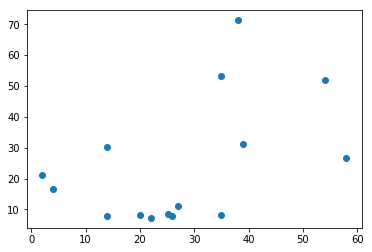

In [68]:
#plot ข้อมูลลงกราฟตามอายุเละราคา โชว์แค่ 15 ข้อมูล 
df_pre = df[['Age','Fare']][:15]
plt.scatter(df_pre['Age'],df_pre['Fare'])

In [69]:
# import scikitlearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
# y=เป้าหมาย x=featueที่ใช้ทำนาย
X = df_pre[['Age']]
y = df_pre[['Fare']]

In [71]:
# สร้าง model และ fit ค่า X , y 
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
# ทำนายค่าเป็นไว้ในตัวแปร y_pred
y_pred = model.predict(X)
y_pred

array([[20.76766645],
       [30.22102937],
       [23.13100718],
       [28.44852382],
       [28.44852382],
       [22.62325508],
       [39.67439228],
       [ 8.95096281],
       [23.72184236],
       [16.040985  ],
       [10.13263318],
       [42.03773301],
       [19.58599609],
       [30.81186455],
       [16.040985  ]])

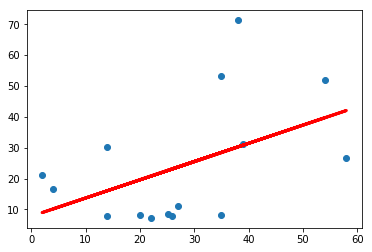

In [73]:
# plot ค่าที่ทำนายได้ 
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'red', linewidth=3) 

In [76]:
# วัดโมเดลว่าทำงานได้ดีแค่ไหน 
# r2_score ถ้าบวกมากยิ่งดีมาก
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))
print(model.coef_)


297.2445146312035
0.22221194466556982
[[0.59083518]]


## Train/Test set 
    การแบ่งข้อมูลเป็นชุดการเรียนรู้และชุดทดสอบ

In [122]:
# กำหนดขนาดของข้อมูล Train / Test
# train = 889 - 260 = 629ข้อมูล
# test = 889 - 629 = 260 ข้อมูล
df_test = df[['Age','Fare']]
testsize = 260
trainsize = df_test[:-testsize].shape[0]
trainsize

629

In [125]:
# ใส่ข้อมูลลงในตัวแปร
x_train = df_test[['Age']][:-testsize]
x_test = df_test[['Age']][trainsize:]
y_train = df_test['Fare'][:-testsize]
y_test = df_test['Fare'][trainsize:]


Text(0.5, 1.0, 'Testing Set')

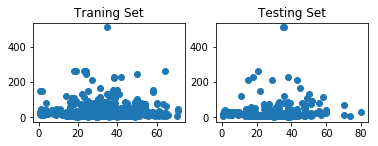

In [126]:
# plot ข้อมูล Train,Test
plt.subplot(2,2,1)
plt.scatter(x_train,y_train)
plt.title('Traning Set')
plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.title('Testing Set')

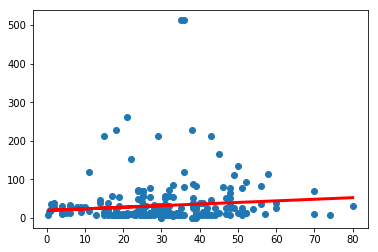

In [127]:
#นำข้อมูล train มาใส่ใน model 
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

# ทำนายและ plot ค่า test ลงไป 
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = 'red' , linewidth= 3)
plt.show()

In [128]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(model.coef_)


3360.381104932917
0.012722067267281756
[0.4125572]
